In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("police.csv")

In [3]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [5]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [6]:
df.isna().mean()
#county name has all rows with NA...it will be dropped
#search type column will also be dropped (96% of rows has no value)

stop_date             0.000000
stop_time             0.000000
county_name           1.000000
driver_gender         0.058153
driver_age_raw        0.058066
driver_age            0.061270
driver_race           0.058131
violation_raw         0.058131
violation             0.058131
search_conducted      0.000000
search_type           0.965163
stop_outcome          0.058131
is_arrested           0.058131
stop_duration         0.058131
drugs_related_stop    0.000000
dtype: float64

In [7]:
df.drop(columns = ["county_name", "search_type"], inplace=True)

#dropped columns

In [8]:
df.shape

(91741, 13)

In [9]:
df.dropna(axis = 0, how="any", inplace=True)
#dropped rows with na...almost 5% of rows had na in all the columns

In [10]:
df.shape

#new df dimension

(86113, 13)

In [11]:
df.dtypes

#a few columns have the wrong type

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [12]:
df = df.astype({"driver_age": int, "is_arrested": bool})

#changed type of the driver age column from float to int
#changed type of the column "is arrested" from str to boolean

In [13]:
df["stop_date"] = pd.to_datetime(df.stop_date)
df["stop_time"] = pd.to_datetime(df.stop_time)

#changed types of first two columns from str to datetime

In [14]:
df.dtypes

stop_date             datetime64[ns]
stop_time             datetime64[ns]
county_name                  float64
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [15]:
df["hour"] = df.stop_time.dt.hour
df["minute"] = df.stop_time.dt.minute
df["time"] = df.stop_time.dt.time
df.drop(columns= "stop_time", inplace=True)

#created new columns for hour and minute...it may be useful later on

In [16]:
df["year"] = df.stop_date.dt.year
df["month"] = df.stop_date.dt.month
df["day"] = df.stop_date.dt.day

#created new columns for year, month, day...it may be useful later on

In [17]:
df.head()

,stop_date,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,hour,minute,time,year,month,day
0,2005-01-02,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,1,55,01:55:00,2005,1,2
1,2005-01-18,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,8,15,08:15:00,2005,1,18
2,2005-01-23,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,23,15,23:15:00,2005,1,23
3,2005-02-20,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,17,15,17:15:00,2005,2,20
4,2005-03-14,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,10,0,10:00:00,2005,3,14


In [18]:
df["extra_column"] = 1

#created extra column and assigned value of 1 to each row...the column will be useful when performing calculations

In [19]:
crimes_by_year = df.groupby("year").extra_column.sum().values
years_crimes = df.groupby("year").extra_column.sum().index

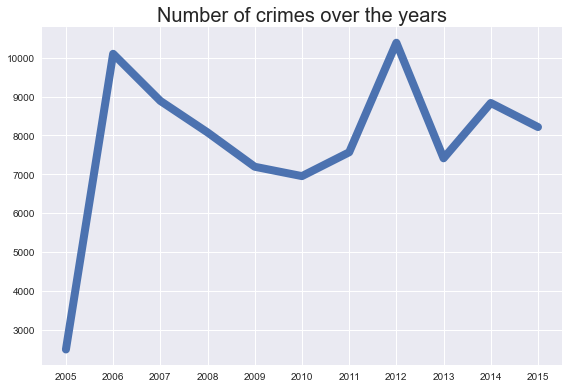

In [20]:
plt.style.use("seaborn")
plt.plot(years_crimes, crimes_by_year, linewidth=8)
plt.title("Number of crimes over the years",fontdict={"fontsize": 20})
plt.xticks(ticks = years_crimes,labels=years_crimes)
plt.tight_layout()

#the number of crimes has spiked between 2005 and 2006
#crimes have then decreased consistently between 2006 and 2010.
#Between 2010 and 2012 crimes have increased again reaching their peak
#After 2012 crimes have decreased again even though they've slightly increased in 2014

In [21]:
df.groupby("driver_gender").extra_column.sum()
#overall man have committed more crimes than women

driver_gender
F    23464
M    62649
Name: extra_column, dtype: int64

In [22]:
total_crimes_by_sex = df.groupby("driver_gender").extra_column.sum().values
gender_pie_chart = df.groupby("driver_gender").extra_column.sum().index


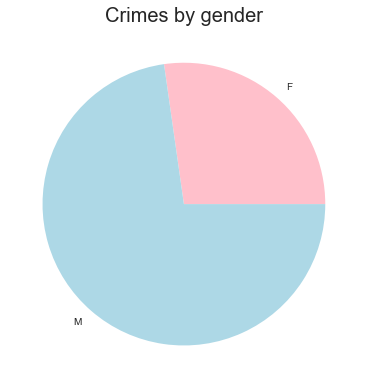

In [23]:
plt.style.use("seaborn")
plt.pie(total_crimes_by_sex, labels=gender_pie_chart, colors=["pink", "lightblue"])
plt.title("Crimes by gender",fontdict={"fontsize": 20})
plt.tight_layout()

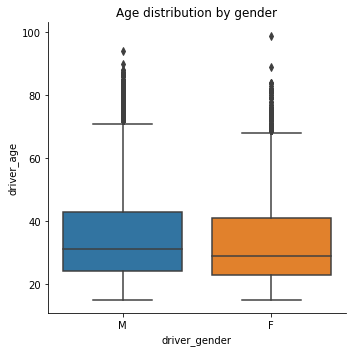

In [4]:
sns.catplot(x = "driver_gender", y = "driver_age", data=df, kind= "box")
plt.title("Age distribution by gender")
plt.tight_layout()

In [24]:
#now it could be useful to see the distribution of crimes between gender for each year

In [25]:
crimes_years_gender =pd.DataFrame(df.groupby(["year", "driver_gender"]).extra_column.sum())

In [26]:
crimes_years_gender.reset_index(inplace=True)
crimes_years_gender

,year,driver_gender,extra_column
0,2005,F,645
1,2005,M,1844
2,2006,F,2778
3,2006,M,7323
4,2007,F,2522
5,2007,M,6366
6,2008,F,2113
7,2008,M,5964
8,2009,F,1704
9,2009,M,5489


In [27]:
df.driver_gender.value_counts(dropna=False)

#the driver_gender column contains only two values: M and F

M    62649
F    23464
Name: driver_gender, dtype: int64

In [28]:
female_df = df.loc[df.driver_gender == "F"]
female_df.groupby("year").extra_column.sum()

year
2005     645
2006    2778
2007    2522
2008    2113
2009    1704
2010    1825
2011    1887
2012    2924
2013    2165
2014    2518
2015    2383
Name: extra_column, dtype: int64

In [29]:
male_df = df.loc[df.driver_gender == "M"]
male_df.groupby("year").extra_column.sum()

year
2005    1844
2006    7323
2007    6366
2008    5964
2009    5489
2010    5127
2011    5679
2012    7462
2013    5246
2014    6317
2015    5832
Name: extra_column, dtype: int64

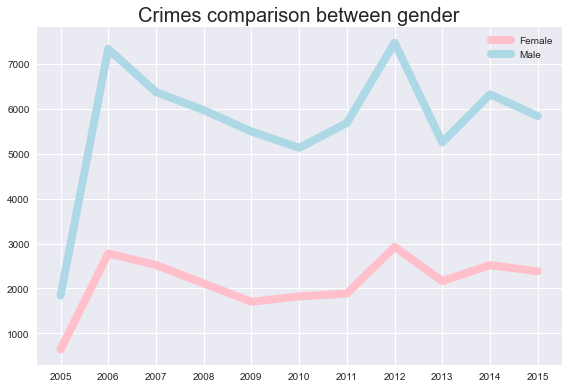

In [30]:
plt.style.use("seaborn")
plt.plot(female_df.groupby("year").extra_column.sum().index,female_df.groupby("year").extra_column.sum().values, label="Female", color="pink", linewidth=8)
plt.plot(male_df.groupby("year").extra_column.sum().index,male_df.groupby("year").extra_column.sum().values, label="Male", color="lightblue", linewidth=8)
plt.title("Crimes comparison between gender",fontdict={"fontsize": 20})
plt.legend()
plt.xticks(ticks = female_df.groupby("year").extra_column.sum().index,labels=female_df.groupby("year").extra_column.sum().index)
plt.tight_layout()

#men experienced a steeper increase in the number of crimes between 2005 and 2006 compared to women

In [31]:
df.head()

,stop_date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,hour,minute,time,year,month,day,extra_column
0,2005-01-02,M,1985.0,20,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1,55,01:55:00,2005,1,2,1
1,2005-01-18,M,1965.0,40,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8,15,08:15:00,2005,1,18,1
2,2005-01-23,M,1972.0,33,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23,15,23:15:00,2005,1,23,1
3,2005-02-20,M,1986.0,19,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17,15,17:15:00,2005,2,20,1
4,2005-03-14,F,1984.0,21,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10,0,10:00:00,2005,3,14,1


In [32]:
df.groupby("driver_race").extra_column.sum().sort_values(ascending=False)

driver_race
White       61947
Black       12197
Hispanic     9477
Asian        2253
Other         239
Name: extra_column, dtype: int64

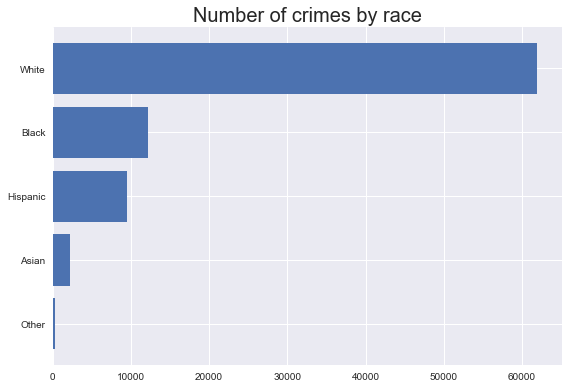

In [33]:
plt.style.use("seaborn")
plt.barh(df.groupby("driver_race").extra_column.sum().sort_values(ascending=True).index, df.groupby("driver_race").extra_column.sum().sort_values(ascending=True).values)
plt.title("Number of crimes by race", fontdict={"fontsize":20})
plt.tight_layout()

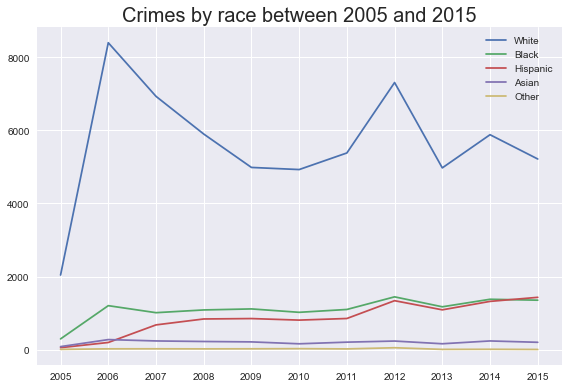

In [34]:
df.loc[df.driver_race == "White"].groupby("year").extra_column.sum()
df.loc[df.driver_race == "Black"].groupby("year").extra_column.sum()
df.loc[df.driver_race == "Hispanic"].groupby("year").extra_column.sum()
df.loc[df.driver_race == "Asian"].groupby("year").extra_column.sum()
df.loc[df.driver_race == "Other"].groupby("year").extra_column.sum()

plt.style.use("seaborn")
plt.plot(df.loc[df.driver_race == "White"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "White"].groupby("year").extra_column.sum().values, label="White")
plt.plot(df.loc[df.driver_race == "Black"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "Black"].groupby("year").extra_column.sum().values, label="Black")
plt.plot(df.loc[df.driver_race == "Hispanic"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "Hispanic"].groupby("year").extra_column.sum().values, label="Hispanic")
plt.plot(df.loc[df.driver_race == "Asian"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "Asian"].groupby("year").extra_column.sum().values, label="Asian")
plt.plot(df.loc[df.driver_race == "Other"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "Other"].groupby("year").extra_column.sum().values, label="Other")

plt.title("Crimes by race between 2005 and 2015", fontdict={"fontsize":20})
plt.xticks(df.loc[df.driver_race == "White"].groupby("year").extra_column.sum().index, df.loc[df.driver_race == "White"].groupby("year").extra_column.sum().index)
plt.legend()
plt.tight_layout()

#crimes committed by Black and Hispanics have increased in the time period taken into consideration
#there's been a hugh increase in the numbe rof crimes committed by white people between 2005 and 2006 followed by a general decrease (apart from an increase between 2011 and 2012). Overall crimes committed by white people were in 2015 higher then 10 years before even though at a lower levels compared to 2006 levels.
#number of crimes committed by asian and "other" races have remained stable

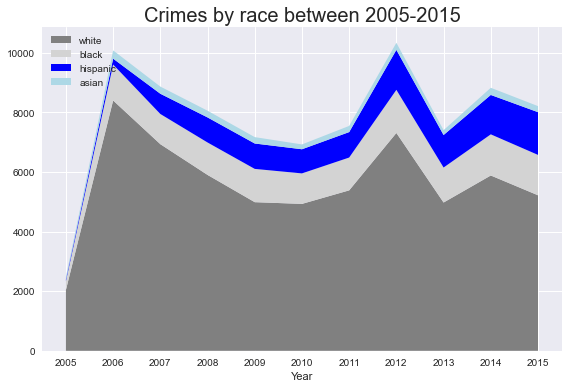

In [35]:
plt.style.use("seaborn")

years = range(2005, 2016)

white = df.loc[df.driver_race == "White"].groupby("year").extra_column.sum().values
black = df.loc[df.driver_race == "Black"].groupby("year").extra_column.sum().values
hispanic = df.loc[df.driver_race == "Hispanic"].groupby("year").extra_column.sum().values
asian = df.loc[df.driver_race == "Asian"].groupby("year").extra_column.sum().values

labels= ["white", "black", "hispanic", "asian"]
colors = ["grey", "lightgrey", "blue", "lightblue"]

plt.stackplot(years,white, black, hispanic, asian, labels=labels, colors=colors)
plt.legend(loc= "upper left")
plt.xticks(ticks=range(2005,2016))
plt.xlabel("Year")

plt.title("Crimes by race between 2005-2015", fontdict={"fontsize":20} )
plt.tight_layout()

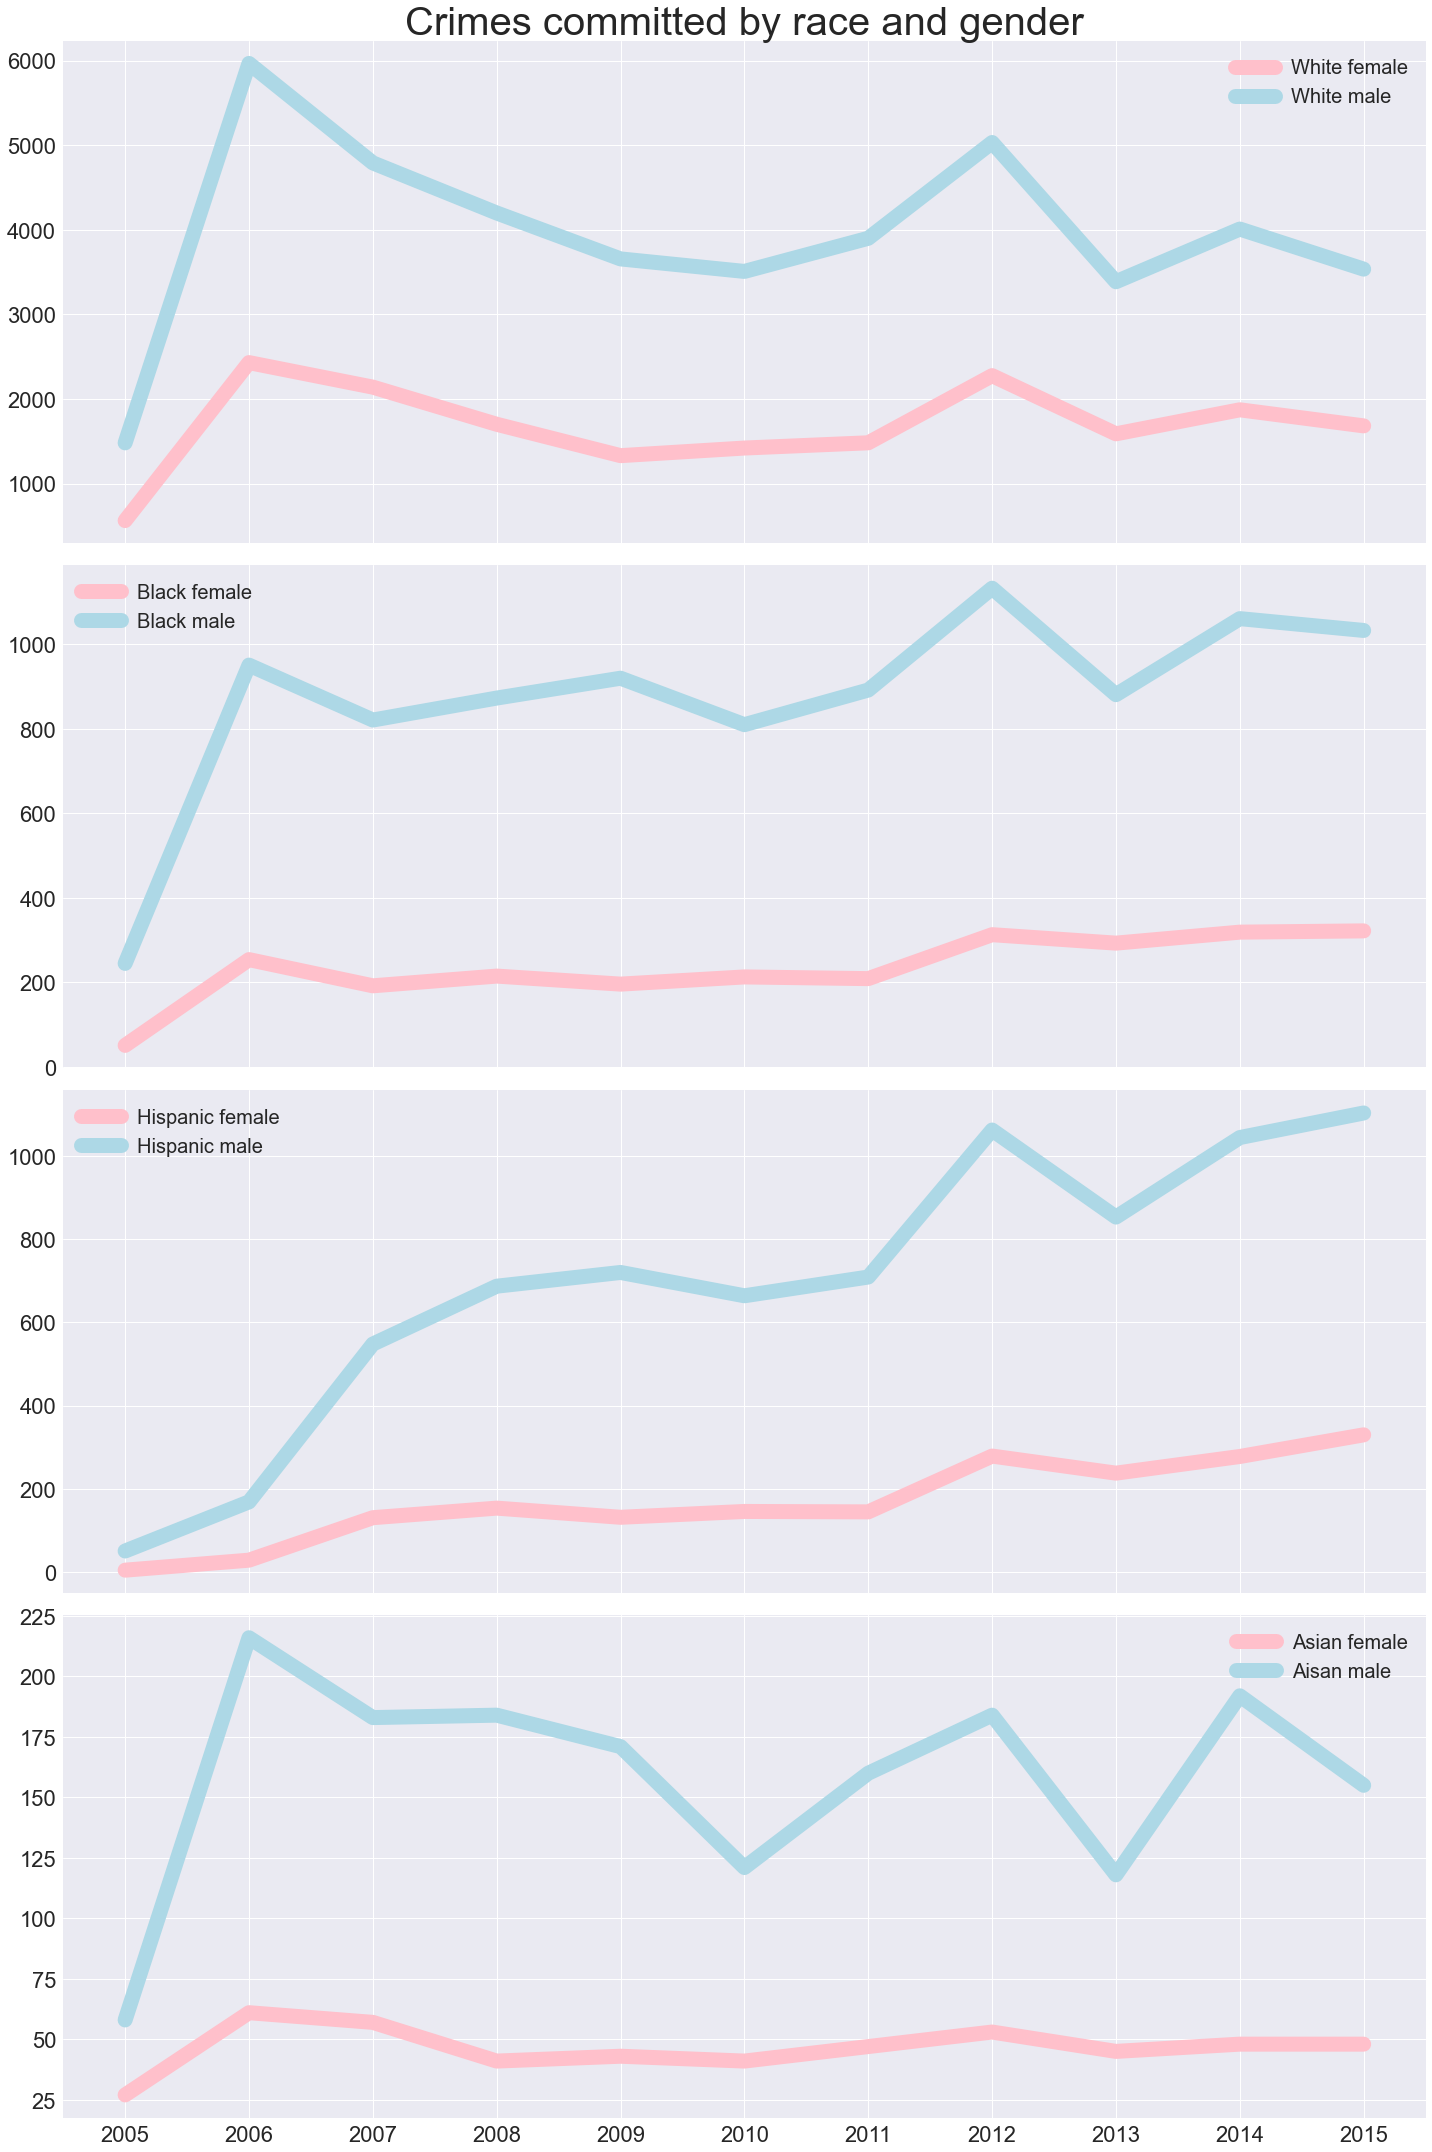

In [36]:
df.loc[(df.driver_race == "White") & (df.driver_gender == "F")].groupby("year").extra_column.sum()
df.loc[(df.driver_race == "White") & (df.driver_gender == "M")].groupby("year").extra_column.sum()
#df.loc[df.driver_race == "Black"].groupby("driver_gender").extra_column.sum()
#df.loc[df.driver_race == "Hispanic"].groupby("driver_gender").extra_column.sum()
#df.loc[df.driver_race == "Asian"].groupby("driver_gender").extra_column.sum()

plt.style.use("seaborn")


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize= (20,30))

ax1.plot(df.loc[(df.driver_race == "White") & (df.driver_gender == "F")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "White") & (df.driver_gender == "F")].groupby("year").extra_column.sum().values, label="White female", color="pink", linewidth=15)
ax1.plot(df.loc[(df.driver_race == "White") & (df.driver_gender == "M")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "White") & (df.driver_gender == "M")].groupby("year").extra_column.sum().values, label="White male", color="lightblue", linewidth=15)

ax2.plot(df.loc[(df.driver_race == "Black") & (df.driver_gender == "F")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Black") & (df.driver_gender == "F")].groupby("year").extra_column.sum().values, label="Black female",color="pink", linewidth=15)
ax2.plot(df.loc[(df.driver_race == "Black") & (df.driver_gender == "M")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Black") & (df.driver_gender == "M")].groupby("year").extra_column.sum().values, label="Black male",color="lightblue", linewidth=15)

ax3.plot(df.loc[(df.driver_race == "Hispanic") & (df.driver_gender == "F")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Hispanic") & (df.driver_gender == "F")].groupby("year").extra_column.sum().values, label="Hispanic female",color="pink", linewidth=15)
ax3.plot(df.loc[(df.driver_race == "Hispanic") & (df.driver_gender == "M")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Hispanic") & (df.driver_gender == "M")].groupby("year").extra_column.sum().values, label="Hispanic male",color="lightblue", linewidth=15)

ax4.plot(df.loc[(df.driver_race == "Asian") & (df.driver_gender == "F")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Asian") & (df.driver_gender == "F")].groupby("year").extra_column.sum().values, label="Asian female",color="pink", linewidth=15)
ax4.plot(df.loc[(df.driver_race == "Asian") & (df.driver_gender == "M")].groupby("year").extra_column.sum().index, df.loc[(df.driver_race == "Asian") & (df.driver_gender == "M")].groupby("year").extra_column.sum().values, label="Aisan male",color="lightblue", linewidth=15)

ax1.legend(prop={"size":20})

ax1.set_title("Crimes committed by race and gender", fontdict={"fontsize":40})

ax2.legend(prop={"size":20})

ax3.legend(prop={"size":20})

ax4.legend(prop={"size":20})
ax4.set_xticks(df.loc[(df.driver_race == "Asian") & (df.driver_gender == "M")].groupby("year").extra_column.sum().index)
ax4.tick_params(axis='both', which='major', labelsize=22)
ax3.tick_params(axis='both', which='major', labelsize=22)
ax2.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both', which='major', labelsize=22)

plt.tight_layout()

In [37]:
#above we can see more details regarding crimes committed by gender within a particular race.
#in particular it is interesting that the number of crimes committed by hispanics male has increased consistently and significantly
#overall crimes committed by black and hispanics males have had the highest % of increase

In [38]:
df.driver_age.describe()

#average age of people committing crimes is 34 years old

count    86113.000000
mean        34.011868
std         12.738786
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         99.000000
Name: driver_age, dtype: float64

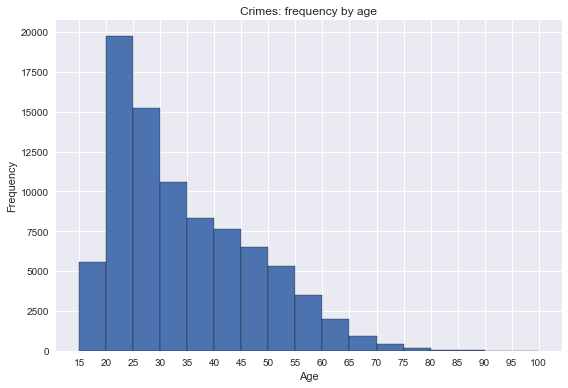

In [39]:
plt.style.use("seaborn")

bins = range(15,105,5)


plt.hist(df.driver_age, bins=bins, edgecolor= "Black")


plt.title("Crimes: frequency by age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(ticks= bins, labels=bins)
plt.tight_layout()

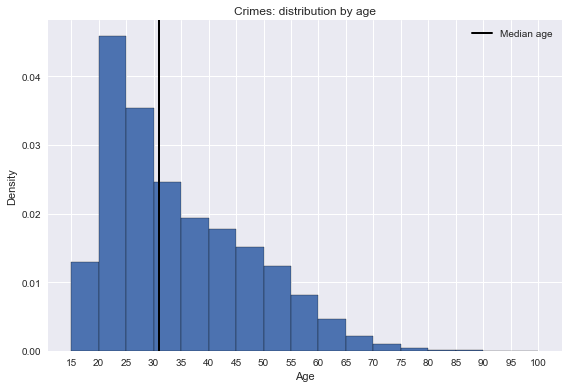

In [40]:
plt.style.use("seaborn")

bins = range(15,105,5)


plt.hist(df.driver_age, bins=bins, edgecolor= "Black", density=True)
plt.axvline(df.driver_age.median(), color="Black", label= "Median age", linewidth= 2)

plt.title("Crimes: distribution by age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.xticks(ticks= bins, labels=bins)
plt.tight_layout()
plt.legend()

#as it is possible to see, as people get older they commit less crimes

Text(0.5, 1.0, 'Crimes: distribution by age and by gender')

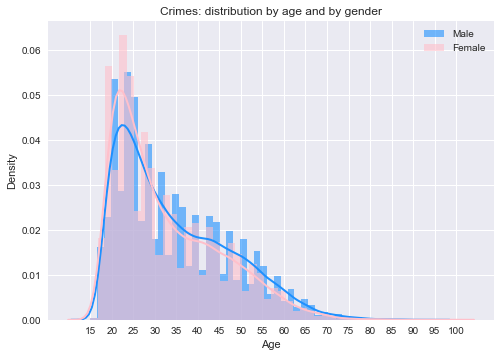

In [41]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(male_df.driver_age, color="dodgerblue", label="Male",**kwargs, norm_hist=True)
sns.distplot(female_df.driver_age, color="pink", label="Female",**kwargs, norm_hist=True)
plt.ylabel("Density")
plt.xlabel("Age")
plt.xticks(ticks=bins, labels=bins)
plt.legend()
plt.title("Crimes: distribution by age and by gender")
#crimes frequency by age and gender

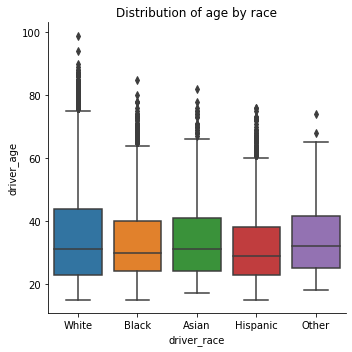

In [8]:
sns.catplot(x = "driver_race", y = "driver_age", data=df, kind= "box")
plt.title("Distribution of age by race")
plt.tight_layout()

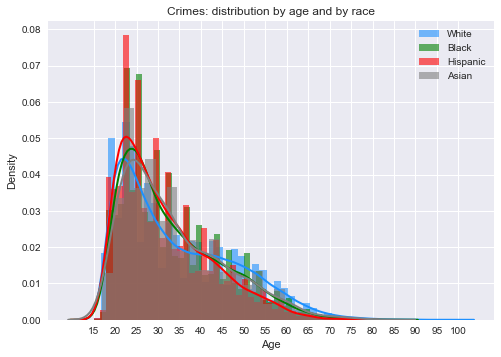

In [42]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(df.loc[df.driver_race == "White"].driver_age, color="dodgerblue", label="White",**kwargs, norm_hist=True)
sns.distplot(df.loc[df.driver_race == "Black"].driver_age, color="green", label="Black",**kwargs, norm_hist=True)
sns.distplot(df.loc[df.driver_race == "Hispanic"].driver_age, color="red", label="Hispanic",**kwargs, norm_hist=True)
sns.distplot(df.loc[df.driver_race == "Asian"].driver_age, color="grey", label="Asian",**kwargs, norm_hist=True)
plt.ylabel("Density")
plt.xticks(ticks=bins, labels=bins)
plt.xlabel("Age")
plt.title("Crimes: distribution by age and by race")

plt.legend()

In [43]:
df.head()

,stop_date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,hour,minute,time,year,month,day,extra_column
0,2005-01-02,M,1985.0,20,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1,55,01:55:00,2005,1,2,1
1,2005-01-18,M,1965.0,40,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8,15,08:15:00,2005,1,18,1
2,2005-01-23,M,1972.0,33,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23,15,23:15:00,2005,1,23,1
3,2005-02-20,M,1986.0,19,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17,15,17:15:00,2005,2,20,1
4,2005-03-14,F,1984.0,21,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10,0,10:00:00,2005,3,14,1


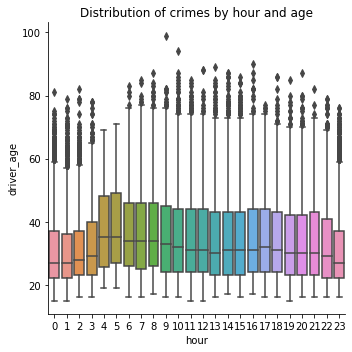

In [18]:
sns.catplot(x = "hour", y = "driver_age", data=df, kind = "box")
plt.title("Distribution of crimes by hour and age")
plt.tight_layout()


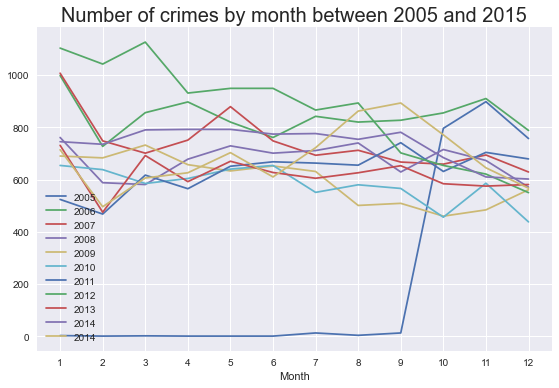

In [48]:
plt.style.use("seaborn")
plt.plot(df.loc[df.year == 2005].groupby("month").extra_column.sum().index, df.loc[df.year == 2005].groupby("month").extra_column.sum().values, label="2005")
plt.plot(df.loc[df.year == 2006].groupby("month").extra_column.sum().index, df.loc[df.year == 2006].groupby("month").extra_column.sum().values, label="2006")
plt.plot(df.loc[df.year == 2007].groupby("month").extra_column.sum().index, df.loc[df.year == 2007].groupby("month").extra_column.sum().values, label="2007")
plt.plot(df.loc[df.year == 2008].groupby("month").extra_column.sum().index, df.loc[df.year == 2008].groupby("month").extra_column.sum().values, label="2008")
plt.plot(df.loc[df.year == 2009].groupby("month").extra_column.sum().index, df.loc[df.year == 2009].groupby("month").extra_column.sum().values, label="2009")
plt.plot(df.loc[df.year == 2010].groupby("month").extra_column.sum().index, df.loc[df.year == 2010].groupby("month").extra_column.sum().values, label="2010")
plt.plot(df.loc[df.year == 2011].groupby("month").extra_column.sum().index, df.loc[df.year == 2011].groupby("month").extra_column.sum().values, label="2011")
plt.plot(df.loc[df.year == 2012].groupby("month").extra_column.sum().index, df.loc[df.year == 2012].groupby("month").extra_column.sum().values, label="2012")
plt.plot(df.loc[df.year == 2013].groupby("month").extra_column.sum().index, df.loc[df.year == 2013].groupby("month").extra_column.sum().values, label="2013")
plt.plot(df.loc[df.year == 2014].groupby("month").extra_column.sum().index, df.loc[df.year == 2014].groupby("month").extra_column.sum().values, label="2014")
plt.plot(df.loc[df.year == 2015].groupby("month").extra_column.sum().index, df.loc[df.year == 2015].groupby("month").extra_column.sum().values, label="2014")


plt.title("Number of crimes by month between 2005 and 2015", fontdict={"fontsize":20})

plt.xlabel("Month")
plt.xticks(ticks= range(1,13))
plt.legend(loc="lower left")

plt.tight_layout()

In [49]:
df.violation.value_counts()

#speeding by far the most common violation followed by moving violation and equipment

Speeding               48359
Moving violation       16164
Equipment              11007
Other                   4204
Registration/plates     3427
Seat belt               2952
Name: violation, dtype: int64

In [50]:
df.violation.value_counts(normalize=True)*100

Speeding               56.157607
Moving violation       18.770685
Equipment              12.782042
Other                   4.881957
Registration/plates     3.979655
Seat belt               3.428054
Name: violation, dtype: float64

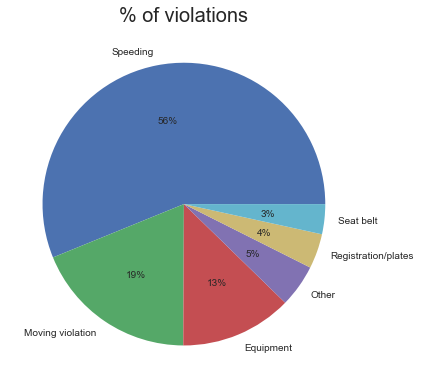

In [51]:
plt.style.use("seaborn")
plt.pie(df.violation.value_counts(normalize=True).values,autopct='%.0f%%', labels=df.violation.value_counts(normalize=True).index)
plt.title("% of violations",fontdict={"fontsize": 20})
plt.tight_layout()

In [52]:
df.groupby("driver_gender").violation.value_counts(normalize=True)*100

# % of moving violation among male higer compared to women (20% vs 14%)
# speeding main violation for both gender
# seat belt least popular violation for both gender

driver_gender  violation          
F              Speeding               65.858336
               Moving violation       13.616604
               Equipment              10.586430
               Registration/plates     4.312990
               Other                   2.919366
               Seat belt               2.706273
M              Speeding               52.524382
               Moving violation       20.701049
               Equipment              13.604367
               Other                   5.617009
               Registration/plates     3.854810
               Seat belt               3.698383
Name: violation, dtype: float64

fig, axs = plt.subplots(2, 2)
axs[0, 0].pie(male_df.violation.value_counts().values, labels=male_df.violation.value_counts().index, shadow=True)
axs[0, 1].pie(female_df.violation.value_counts().values, labels=female_df.violation.value_counts().index, shadow=True)
plt.tight_layout()              

In [53]:
df.groupby("driver_race").violation.value_counts(normalize=True)*100

driver_race  violation          
Asian        Speeding               67.687528
             Moving violation       14.824678
             Equipment               8.921438
             Other                   3.417665
             Registration/plates     2.574345
             Seat belt               2.574345
Black        Speeding               41.190457
             Moving violation       23.538575
             Equipment              18.053620
             Other                   7.108305
             Registration/plates     6.419611
             Seat belt               3.689432
Hispanic     Speeding               32.573599
             Moving violation       25.377229
             Equipment              22.612641
             Registration/plates     7.555133
             Other                   6.067321
             Seat belt               5.814076
Other        Speeding               61.506276
             Moving violation       21.338912
             Other                   8.786611
 

In [54]:
male_df.violation.value_counts(normalize=True)*100

Speeding               52.524382
Moving violation       20.701049
Equipment              13.604367
Other                   5.617009
Registration/plates     3.854810
Seat belt               3.698383
Name: violation, dtype: float64

In [56]:
white_df = df.loc[df.driver_race == "White"]
black_df = df.loc[df.driver_race == "Black"]
asian_df = df.loc[df.driver_race == "Asian"]
hispanic_df = df.loc[df.driver_race == "Hispanic"]

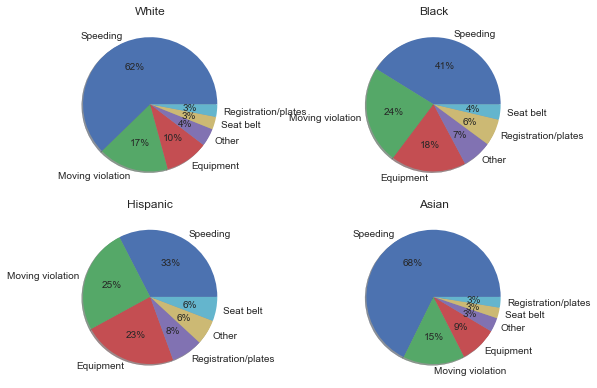

In [57]:
plt.style.use("seaborn")
fig, axs = plt.subplots(2, 2) 
axs[0, 0].pie(white_df.violation.value_counts().values, labels=white_df.violation.value_counts().index,autopct='%.0f%%', shadow=True) 
axs[0, 1].pie(black_df.violation.value_counts().values, labels=black_df.violation.value_counts().index,autopct='%.0f%%', shadow=True) 
axs[1, 0].pie(hispanic_df.violation.value_counts().values, labels=hispanic_df.violation.value_counts().index,autopct='%.0f%%', shadow=True) 
axs[1, 1].pie(asian_df.violation.value_counts().values, labels=asian_df.violation.value_counts().index,autopct='%.0f%%', shadow=True) 
axs[0,0].set_title("White")
axs[0,1].set_title("Black")
axs[1,0].set_title("Hispanic")
axs[1,1].set_title("Asian")

plt.tight_layout()

# % of crimes by race


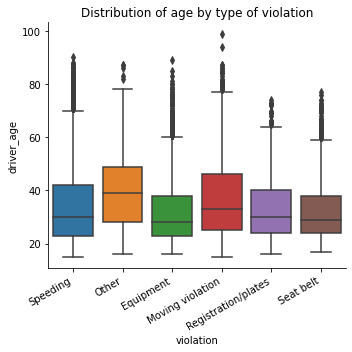

In [19]:
g = sns.catplot(x = "violation", y = "driver_age", data=df, kind = "box")
g.fig.autofmt_xdate()
plt.title("Distribution of age by type of violation")
plt.tight_layout()

In [58]:
df.is_arrested.mean()*100

# 3.39% of all crimes lead to an arrest

3.3966996852972255

In [59]:
df.groupby("driver_gender").is_arrested.mean()*100

# men are more likely to be arrested than women

driver_gender
F    2.531538
M    3.720730
Name: is_arrested, dtype: float64

In [60]:
df.groupby("driver_race").is_arrested.mean().sort_values(ascending=False)*100

#hispanic and black people are more than twice more likely to be arrested than white and three times more likely to be arrested than asian people.

driver_race
Hispanic    5.961802
Black       5.771911
White       2.603839
Asian       1.819796
Other       0.836820
Name: is_arrested, dtype: float64

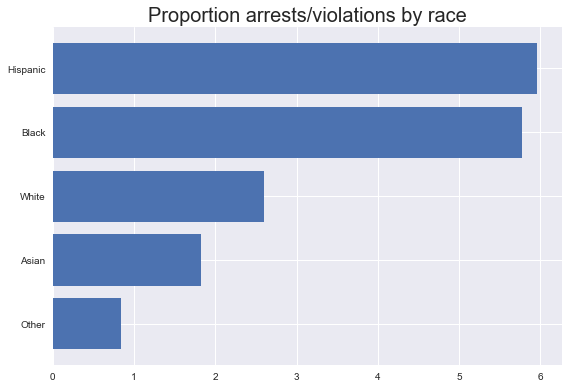

In [61]:
plt.style.use("seaborn")
plt.barh(df.groupby("driver_race").is_arrested.mean().sort_values().index,df.groupby("driver_race").is_arrested.mean().sort_values().values*100)
plt.title("Proportion arrests/violations by race", fontdict={"fontsize":20})

plt.tight_layout()

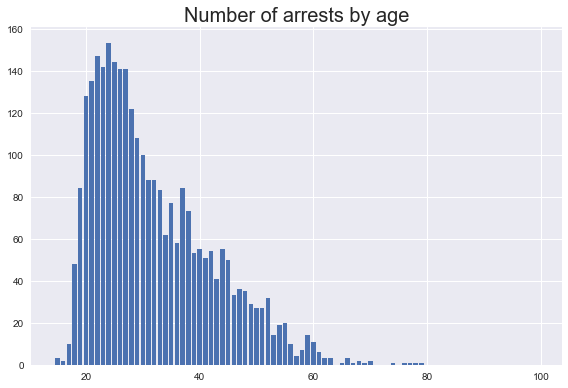

In [62]:
plt.style.use("seaborn")
plt.bar(df.groupby("driver_age").is_arrested.sum().index, df.groupby("driver_age").is_arrested.sum().values)
plt.title("Number of arrests by age", fontdict={"fontsize":20})

plt.tight_layout()

#the majority of arrestes occured among young people

In [63]:
df["age_class"] = np.where(df['driver_age']<=35, "Young", "Old")
df['age_class'] = np.where((df["driver_age"]>35),'Mid Age',df.age_class)
df['age_class'] = np.where((df["driver_age"]>55),'Old',df.age_class)

#categorized people according to their age:
#0-35 young people
#36-55 mid age people
#56+ old people


In [64]:
df.groupby("age_class").is_arrested.sum().sort_values(ascending=False)

#number of arrests are higher amongh young people and mid age people

age_class
Young      2006.0
Mid Age     846.0
Old          73.0
Name: is_arrested, dtype: float64

In [65]:
df.groupby("age_class").violation.value_counts(normalize=True)*100

#violations based on age group

age_class  violation          
Mid Age    Speeding               53.606631
           Moving violation       21.889934
           Equipment              10.524940
           Other                   7.235663
           Registration/plates     3.991189
           Seat belt               2.751643
Old        Speeding               55.380201
           Moving violation       23.991711
           Other                   8.241671
           Equipment               8.066316
           Seat belt               2.215846
           Registration/plates     2.104256
Young      Speeding               57.537319
           Moving violation       16.578709
           Equipment              14.479041
           Registration/plates     4.195567
           Seat belt               3.912847
           Other                   3.296517
Name: violation, dtype: float64

In [66]:
df.groupby("age_class").is_arrested.mean().sort_values(ascending=False)*100

#young people are more likely to be arrested followed by mid age people

age_class
Young      3.780911
Mid Age    3.158602
Old        1.163718
Name: is_arrested, dtype: float64

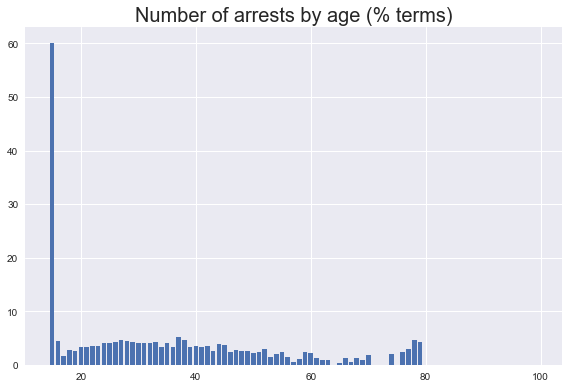

In [67]:
plt.style.use("seaborn")
plt.bar(df.groupby("driver_age").is_arrested.mean().index, df.groupby("driver_age").is_arrested.mean().values*100)
plt.title("Number of arrests by age (% terms)", fontdict={"fontsize":20})

plt.tight_layout()


#the graph tells us for any age the proportion of violations resulting in an arrest

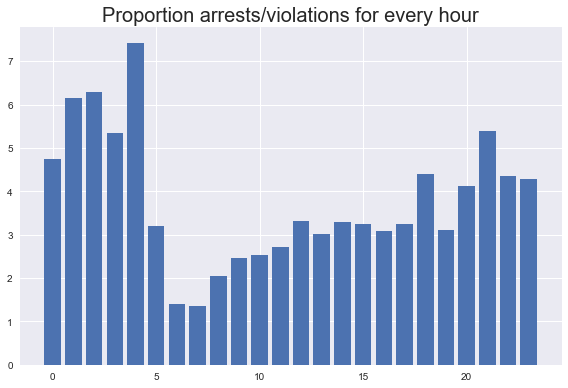

In [68]:
plt.style.use("seaborn")
plt.bar(df.groupby("hour").is_arrested.mean().index, df.groupby("hour").is_arrested.mean().values*100)
plt.title("Proportion arrests/violations for every hour", fontdict={"fontsize":20})

plt.tight_layout()

#the graph tells us for any hour the proportion of violations resulting in an arrest

In [69]:
df.search_conducted.value_counts(dropna=False)

False    82920
True      3193
Name: search_conducted, dtype: int64

In [70]:
df.search_conducted.mean()*100

#3.7% of all violation had a search

3.7079186650099287

In [71]:
df.groupby("driver_gender").search_conducted.mean()*100

# men are more than twice more likely than women to be searched

driver_gender
F    2.007330
M    4.344842
Name: search_conducted, dtype: float64

In [72]:
df.groupby("driver_race").search_conducted.mean().sort_values(ascending = False)*100

# black and white people are more than 3 times more likely to be searched than asian and twice more likely than white people

driver_race
Black       6.468804
Hispanic    6.162288
White       2.850824
Asian       2.263648
Other       1.255230
Name: search_conducted, dtype: float64

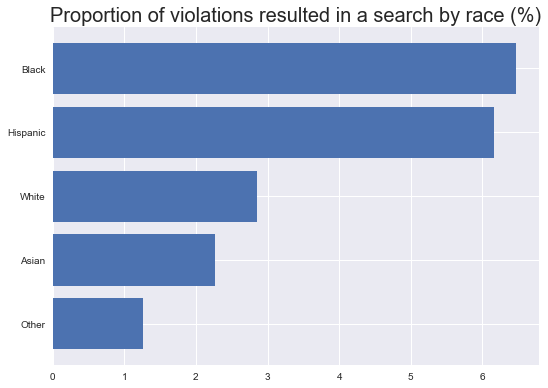

In [73]:
search_race = df.groupby("driver_race").search_conducted.mean().sort_values().values*100

plt.style.use("seaborn")
plt.barh(df.groupby("driver_race").search_conducted.mean().sort_values().index,search_race)
plt.title("Proportion of violations resulted in a search by race (%)", fontdict={"fontsize":20})

plt.tight_layout()



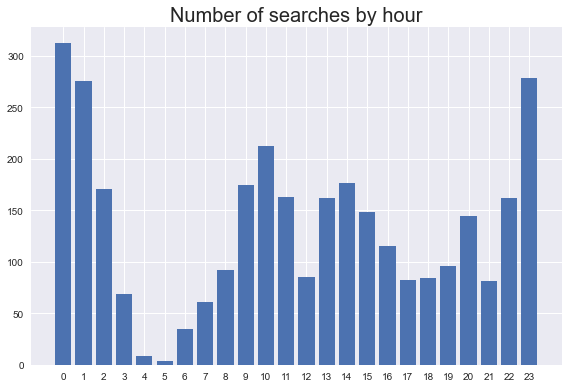

In [74]:
plt.style.use("seaborn")
plt.bar(df.groupby("hour").search_conducted.sum().index, df.groupby("hour").search_conducted.sum().values)
plt.title("Number of searches by hour", fontdict={"fontsize":20})
plt.xticks(ticks=df.groupby("hour").search_conducted.sum().index)

plt.tight_layout()

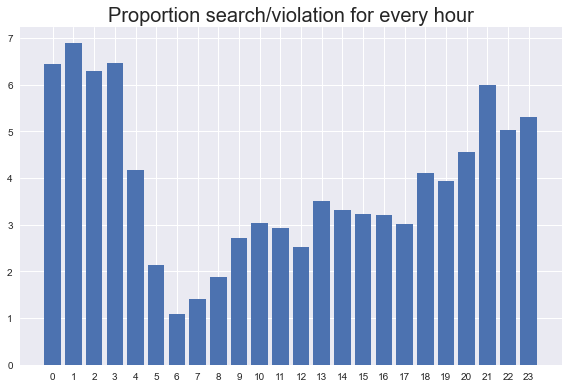

In [75]:
plt.style.use("seaborn")
plt.bar(df.groupby("hour").search_conducted.mean().index, df.groupby("hour").search_conducted.mean().values*100)
plt.title("Proportion search/violation for every hour", fontdict={"fontsize":20})
plt.xticks(ticks=df.groupby("hour").search_conducted.sum().index)

plt.tight_layout()

#the graph tells us for any hour the proprtion of violations having a search
#we can see that between midnight and 3 a.m the proportion of violations having a search is greater

In [76]:
df.drugs_related_stop.value_counts(dropna=False)

False    85299
True       814
Name: drugs_related_stop, dtype: int64

In [77]:
df.drugs_related_stop.mean()*100

#less than 1% of all violations is drug related

0.9452695876348518

In [78]:
df.groupby("driver_gender").drugs_related_stop.mean()*100

#drugs related stop are twice more likely among men compared to women

driver_gender
F    0.409137
M    1.146068
Name: drugs_related_stop, dtype: float64

In [79]:
df.groupby("driver_race").drugs_related_stop.mean()*100

driver_race
Asian       0.488238
Black       1.647946
Hispanic    1.329535
Other       0.418410
White       0.766785
Name: drugs_related_stop, dtype: float64

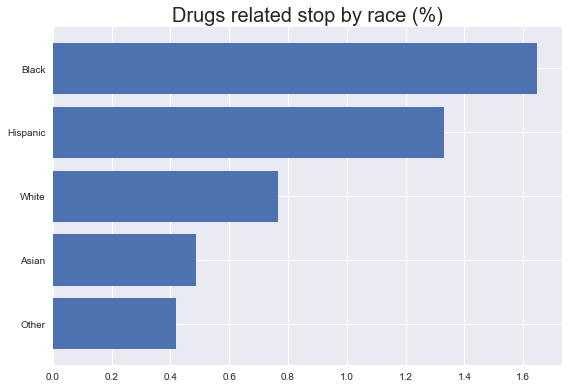

In [80]:
plt.style.use("seaborn")
plt.barh(df.groupby("driver_race").drugs_related_stop.mean().sort_values().index,df.groupby("driver_race").drugs_related_stop.mean().sort_values().values*100)
plt.title("Drugs related stop by race (%)", fontdict={"fontsize":20})

plt.tight_layout()

#drugs related stop are more popular among blacks and hispanics

In [81]:
df.driver_age.describe()

count    86113.000000
mean        34.011868
std         12.738786
min         15.000000
25%         23.000000
50%         31.000000
75%         43.000000
max         99.000000
Name: driver_age, dtype: float64

In [82]:
df.groupby("age_class").search_conducted.mean().sort_values(ascending=False)*100

age_class
Young      4.419858
Mid Age    2.904719
Old        1.115894
Name: search_conducted, dtype: float64

In [83]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69334
16-30 Min    13558
30+ Min       3219
2                1
1                1
Name: stop_duration, dtype: int64

In [84]:
df.loc[(df.stop_duration == "1") | (df.stop_duration == "2")]

,stop_date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,hour,minute,time,year,month,day,extra_column,age_class
55873,2012-01-23,M,1960.0,52,Black,Other Traffic Violation,Moving violation,False,Arrest Passenger,True,2,False,11,17,11:17:00,2012,1,23,1,Mid Age
76624,2014-04-13,F,1965.0,49,White,Speeding,Speeding,False,Citation,False,1,False,8,34,08:34:00,2014,4,13,1,Mid Age


In [85]:
df.drop(index = [55873, 76624], inplace=True)

#dropped two rows with wrong values

In [86]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69334
16-30 Min    13558
30+ Min       3219
Name: stop_duration, dtype: int64

In [87]:
df.groupby("driver_gender").stop_duration.value_counts(normalize = True)*100

#stop_duration tends to be longer for men compared to women

driver_gender  stop_duration
F              0-15 Min         83.893790
               16-30 Min        14.418446
               30+ Min           1.687764
M              0-15 Min         79.252330
               16-30 Min        16.241540
               30+ Min           4.506129
Name: stop_duration, dtype: float64

In [88]:
df.groupby("driver_race").stop_duration.value_counts(normalize = True)*100

#stop duration tends to be longer for blacks and hispanics

driver_race  stop_duration
Asian        0-15 Min         84.198846
             16-30 Min        12.782956
             30+ Min           3.018198
Black        0-15 Min         77.640210
             16-30 Min        17.112168
             30+ Min           5.247622
Hispanic     0-15 Min         78.368682
             16-30 Min        16.397594
             30+ Min           5.233724
Other        0-15 Min         84.100418
             16-30 Min        13.807531
             30+ Min           2.092050
White        0-15 Min         81.264327
             16-30 Min        15.490911
             30+ Min           3.244762
Name: stop_duration, dtype: float64

In [89]:
df.groupby("age_class").stop_duration.value_counts(normalize=True)*100

#stop duration looks quite similar across the three age groups defined

age_class  stop_duration
Mid Age    0-15 Min         78.683444
           16-30 Min        16.540960
           30+ Min           4.775596
Old        0-15 Min         79.451618
           16-30 Min        16.483341
           30+ Min           4.065041
Young      0-15 Min         81.568531
           16-30 Min        15.255579
           30+ Min           3.175890
Name: stop_duration, dtype: float64

In [90]:
df.head()

,stop_date,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,hour,minute,time,year,month,day,extra_column,age_class
0,2005-01-02,M,1985.0,20,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1,55,01:55:00,2005,1,2,1,Young
1,2005-01-18,M,1965.0,40,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8,15,08:15:00,2005,1,18,1,Mid Age
2,2005-01-23,M,1972.0,33,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23,15,23:15:00,2005,1,23,1,Young
3,2005-02-20,M,1986.0,19,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17,15,17:15:00,2005,2,20,1,Young
4,2005-03-14,F,1984.0,21,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10,0,10:00:00,2005,3,14,1,Young


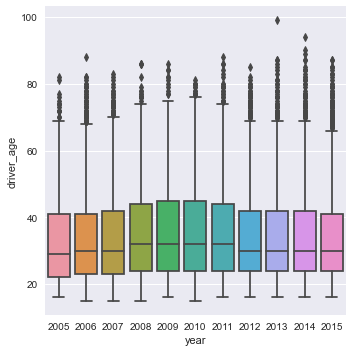

In [103]:
sns.catplot(x = "year", y = "driver_age", data=df, kind = "box")
#we can see that between 2008 and 2011 the median age of people committing a crime was a little bit higher thant that in the other years

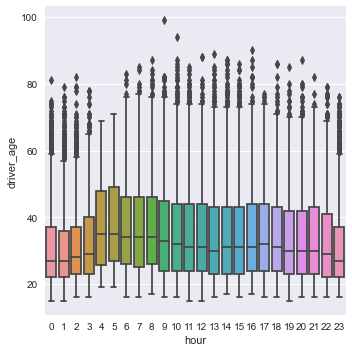

In [104]:
sns.catplot(x = "hour", y = "driver_age", data=df, kind = "box")

#we can see that between 0 A.M and 3 A.M people committing a crime are in general younger compared to those committing a crime in the other hours